KeyboardInterrupt: 

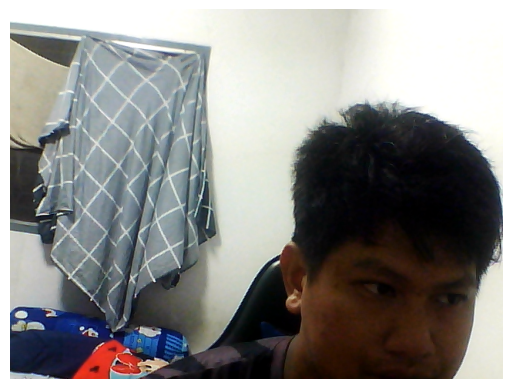

In [3]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# ตั้งค่า MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.7)
mp_drawing = mp.solutions.drawing_utils

# เปิดกล้อง
video_capture = cv2.VideoCapture(0)

try:
    while True:
        ret, frame = video_capture.read()
        
        if not ret:
            print("ไม่สามารถเปิดกล้องได้")
            break

        # แปลงภาพเป็น RGB (เพราะ MediaPipe ใช้ RGB)
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # ตรวจจับมือ
        results = hands.process(rgb_frame)

        # วาดจุดและเชื่อมต่อบนมือที่ตรวจจับได้
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

        # แสดงภาพใน Jupyter Notebook
        clear_output(wait=True)  # ลบภาพเก่าก่อนแสดงภาพใหม่
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))  # แปลง BGR เป็น RGB
        plt.axis('off')  # ปิดแกน
        display(plt.gcf())  # แสดงผลภาพใน Jupyter Notebook
        
        # ตรวจสอบการกดปุ่ม
        key = cv2.waitKey(1) & 0xFF
        if key == ord('s'):  # ถ้ากด 's'
            cv2.imwrite("captured_image.png", frame)  # บันทึกภาพ
            print("บันทึกภาพเรียบร้อยแล้ว: captured_image.png")
        elif key == ord('q'):  # ถ้ากด 'q' ออกจากโปรแกรม
            break
finally:
    # ปิดกล้องและหน้าต่าง
    video_capture.release()
    cv2.destroyAllWindows()
